<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/1.%20TFIM%20VQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 21.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

# Hamiltonian Diagonalization

$$ H = -(1-g) Σ Z_j Z_{j+1} -g Σ X_j  $$

1D 5 Qubit System

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exact_eigen_energy_open(g):
  interation = -(1-g)
  bias = -g

  coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
  operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
  hamiltonian_list = []
  for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
  hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
  hamiltonian_matrix = hamiltonian.to_matrix()

  eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

  lowest_energy = np.min(eigenvalue)
  return np.real(lowest_energy)

In [ ]:
def exact_eigen_energy_closed(g):
  interation = -(1-g)
  bias = -g

  coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
  operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
  hamiltonian_list = []
  for i in range(9):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
  hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
  hamiltonian_matrix = hamiltonian.to_matrix()

  eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

  lowest_energy = np.min(eigenvalue)
  return np.real(lowest_energy)

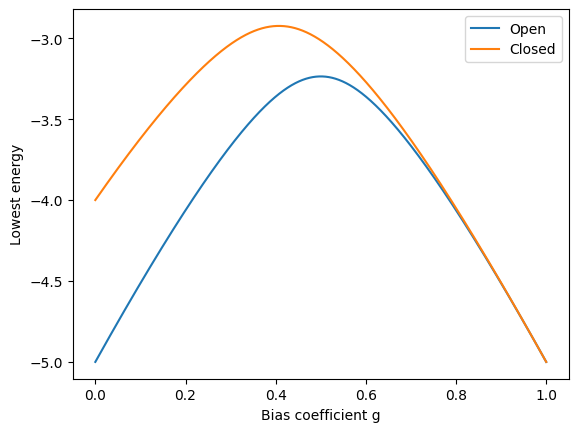

In [ ]:
g_list = np.array([0.0001*g for g in range(10001)])
open_energy_list = np.array([exact_eigen_energy_open(0.0001*g) for g in range(10001)])
closed_energy_list = np.array([exact_eigen_energy_closed(0.0001*g) for g in range(10001)])

plt.figure()
plt.plot(g_list, open_energy_list, label="Open")
plt.plot(g_list, closed_energy_list, label="Closed")
plt.xlabel("Bias coefficient g")
plt.ylabel("Lowest energy")
plt.legend()

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.155367074350501

# VQE in Exact Simulator (Method 1)

quantum_algorithms VQE object

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
import numpy as np

# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

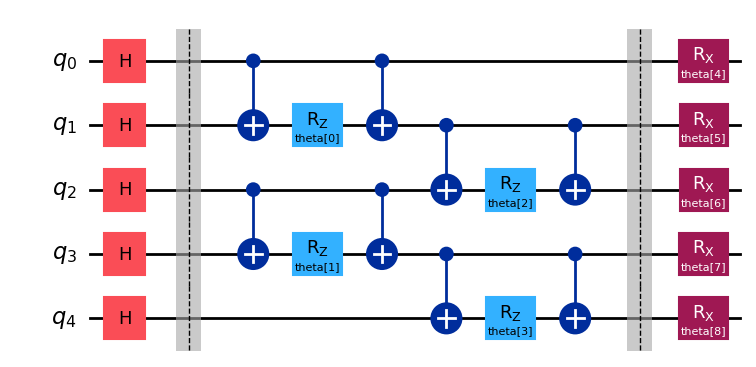

In [ ]:
ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
from qiskit_algorithms.optimizers import CG
from qiskit_algorithms import VQE, SamplingVQE
from qiskit_algorithms.gradients import LinCombEstimatorGradient
from qiskit.primitives import Estimator

step_list = np.array([i for i in range(20)])
vqe_list = []

for max in range(20):

  # Conjugate Gradient algorithm
  optimizer = CG(maxiter=max)

  # Gradient callable
  estimator = Estimator()
  grad = LinCombEstimatorGradient(estimator)  # optional estimator gradient
  vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer, gradient=grad)

  result = vqe.compute_minimum_eigenvalue(hamiltonian)
  vqe_list.append(result.optimal_value)

vqe_list = np.array(vqe_list)

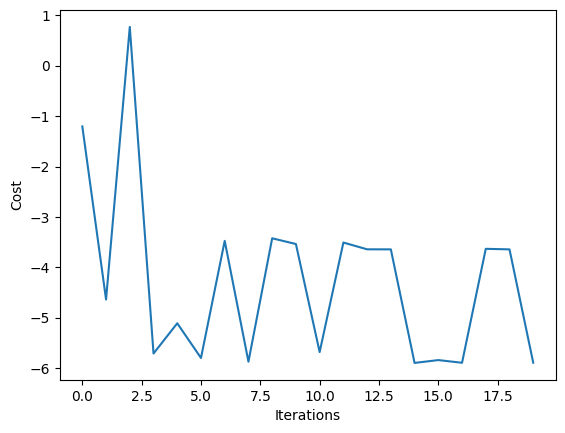

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(step_list, vqe_list)
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# VQE in Exact Simulator (Method 2)

scipy minimize

## Function Definition

In [128]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator

import numpy as np
from scipy.optimize import minimize

In [129]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)


# Estimator

estimator = Estimator()

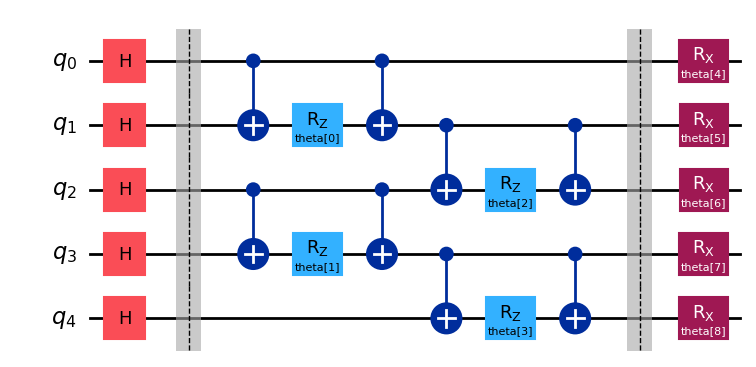

In [130]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [131]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [132]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Minimizing Method Trial

COBYLA, SLSQP, BFGS

In [133]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [134]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="cobyla",
  callback=callback,
)

In [135]:
res

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -5.868435164695018
       x: [ 5.840e+00  6.670e+00  3.884e-01  4.419e-01 -9.753e-01
            2.545e+00  2.181e+00  2.540e+00  2.171e+00]
    nfev: 1000
   maxcv: 0.0

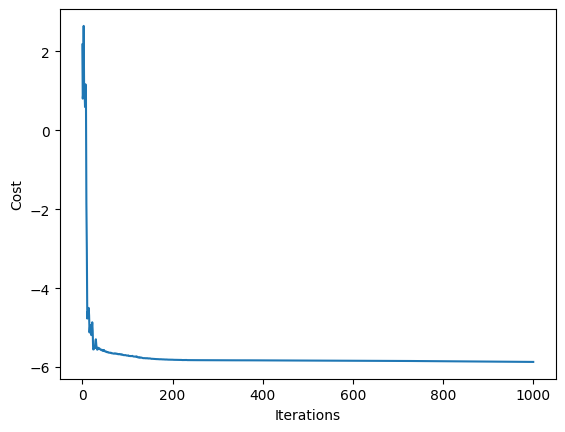

In [136]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [137]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [138]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="SLSQP",
  callback=callback,
)

In [139]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -5.897229043597868
       x: [-4.799e-01  1.296e+01  3.976e-01 -6.763e+00  1.571e+00
            4.611e-04 -1.571e+00  7.085e-04  1.570e+00]
     nit: 26
     jac: [-2.707e-04 -2.074e-04  1.443e-04 -7.766e-05  1.004e-04
            1.033e-04  1.544e-05  1.583e-04  4.572e-05]
    nfev: 262
    njev: 26

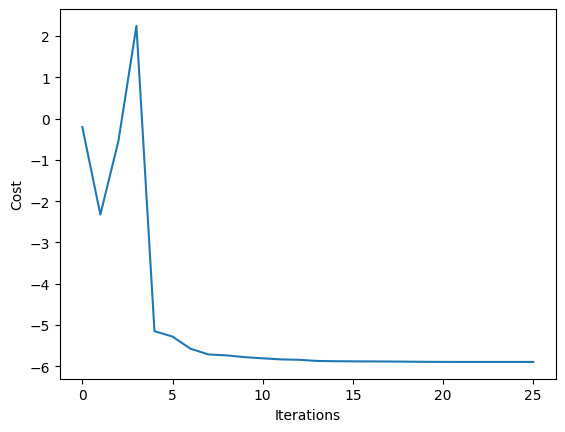

In [140]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [141]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [142]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="BFGS",
  callback=callback,
)

In [143]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.8972291332323294
        x: [ 4.797e-01 -3.975e-01  6.681e+00  5.803e+00 -4.712e+00
             3.142e+00  1.571e+00 -1.679e-05  1.571e+00]
      nit: 28
      jac: [ 9.060e-06 -4.709e-06 -6.557e-06  4.172e-06  5.960e-07
            -4.053e-06 -5.960e-06 -2.384e-06  2.146e-06]
 hess_inv: [[ 4.493e-01  2.554e-02 ...  4.716e-02 -1.554e-01]
            [ 2.554e-02  4.621e-01 ... -7.226e-02  1.593e-01]
            ...
            [ 4.716e-02 -7.226e-02 ...  6.165e+00 -5.498e+00]
            [-1.554e-01  1.593e-01 ... -5.498e+00  6.950e+00]]
     nfev: 340
     njev: 34

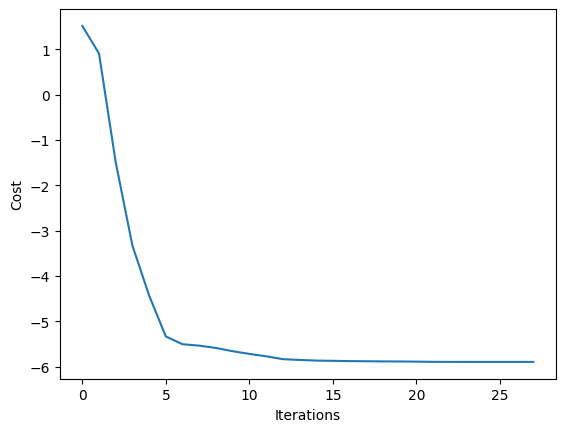

In [144]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

## Finding Seed of np.random.seed

In [145]:
local_minimum_list = []
seed_list = []
k = 0

while (len(seed_list)<120) :

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

  if local_minimum_dict[-1] < -5 :
    seed_list.append(k)

  k = k + 1


local_minimum_list = np.array(local_minimum_list)
seed_list = np.array(seed_list)

In [146]:
local_minimum_list

array([-3.64352019, -5.82879886, -3.64352017, -3.64352019, -5.89666719,
       -5.89460313, -5.87175791, -5.89714665, -5.8970116 , -3.64352019,
       -5.82318112, -5.88723766, -5.86284708, -5.89633351, -5.89712631,
       -5.89706667, -3.64352018, -5.89640049, -5.89686096, -5.84344741,
       -5.8972277 , -5.89514208, -3.64352019, -5.89722481, -5.89281514,
       -5.8954058 , -3.64352019, -5.89678753, -5.89722848, -5.8262015 ,
       -5.89560605, -5.83363386, -3.64352019, -3.64352019, -5.87957003,
       -3.64352018, -5.82674789, -5.89196626, -5.82341307, -5.8972198 ,
       -5.82579769, -5.89274968, -5.89310789, -5.89679848, -5.89121954,
       -5.89066143, -5.89556185, -5.82725177, -5.89500158, -5.88381387,
       -3.64352019, -5.89722881, -5.86661138, -3.49034862, -3.32868587,
       -5.8971298 , -5.8971071 , -3.27120546, -3.64348142, -5.89578444,
       -3.64351987, -5.88977925, -3.64351   , -5.892863  , -3.48455584,
       -5.89686359, -5.89722776, -5.89714245, -5.89702045, -3.61

In [147]:
seed_list

array([  1,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,  17,
        18,  19,  20,  21,  23,  24,  25,  27,  28,  29,  30,  31,  34,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  51,  52,  55,  56,  59,  61,  63,  65,  66,  67,  68,  70,
        71,  74,  75,  76,  77,  78,  81,  86,  87,  90,  93,  95,  96,
        97,  99, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112,
       113, 114, 115, 116, 118, 119, 121, 124, 125, 126, 127, 128, 131,
       132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 144, 147, 148,
       149, 150, 151, 152, 154, 155, 157, 162, 165, 166, 169, 171, 172,
       174, 177, 178])

# VQE in Noisy Simulator (Trial)

scipy minimize method trial ("cobyla", "bfsd", "slsqp")

## Function Definition

In [148]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [149]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

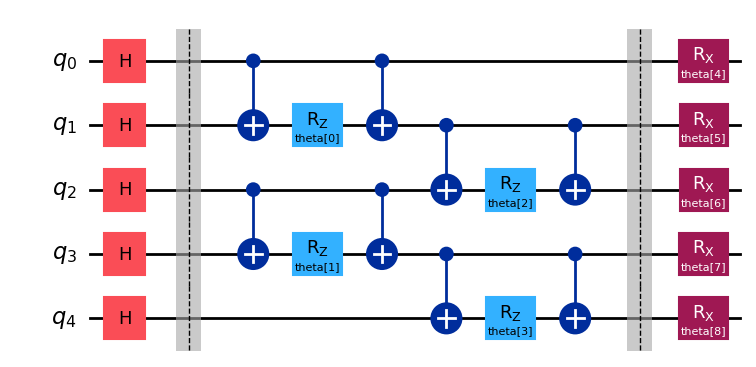

In [150]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [151]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05
cx_depolarizing_prob = 0.02


# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'reset', 'cx', 'measure', 'u1', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


In [152]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [153]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Minimizing Method Trial

COBYLA, SLSQP, BFGS

In [154]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(5)
x0 = 2 * np.pi * np.random.random(9)

x0

array([1.39482423, 5.47097243, 1.29885476, 5.77180256, 3.06877801,
       3.84370005, 4.81234099, 3.25731628, 1.86485255])

In [155]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="cobyla",
  callback=callback,
)

In [156]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.912109375
       x: [-1.132e-01  6.323e+00  3.235e-01  6.450e+00  2.134e+00
            5.390e+00  5.455e+00  3.155e+00  2.198e+00]
    nfev: 95
   maxcv: 0.0

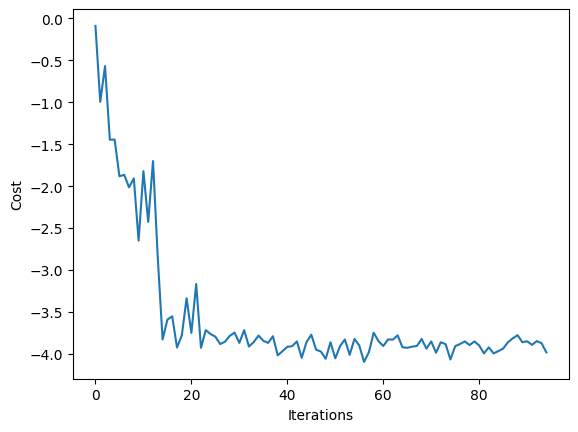

In [157]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [158]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [159]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="SLSQP",
  callback=callback,
)

In [160]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.548828125
       x: [ 7.186e+03 -4.392e+05 -5.508e+05  2.011e+05  8.076e+05
           -1.159e+05 -6.759e+05 -2.503e+05 -5.767e+05]
     nit: 44
     jac: [-9.044e+06 -1.035e+07  7.471e+06 -1.311e+06 -1.298e+07
           -4.981e+06 -3.146e+06 -1.101e+07 -1.507e+07]
    nfev: 881
    njev: 44

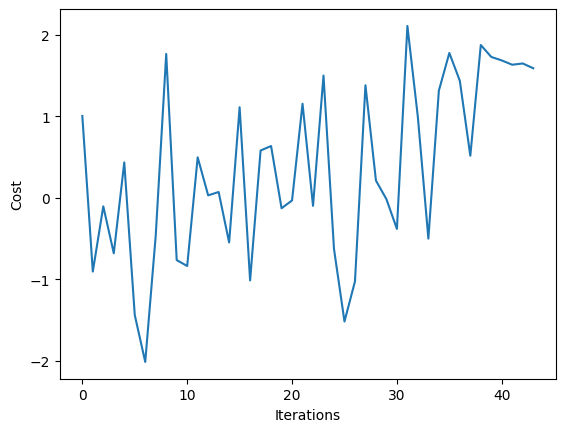

In [161]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [162]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [163]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="BFGS",
  callback=callback,
)

In [164]:
res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.7734375
        x: [ 2.620e+00  4.526e+00  7.250e-04  1.900e+00  9.221e-01
             5.802e-01  1.170e+00  2.171e+00  2.493e+00]
      nit: 2
      jac: [ 1.402e+07  7.602e+06  6.816e+06  7.471e+06  1.494e+07
             3.015e+06  6.160e+06  6.947e+06  1.062e+07]
 hess_inv: [[ 1.500e+00 -4.689e-01 ...  9.510e-02  1.151e+00]
            [-4.689e-01  7.573e-01 ... -3.190e-02 -1.712e-01]
            ...
            [ 9.510e-02 -3.190e-02 ...  8.968e-01  2.755e-02]
            [ 1.151e+00 -1.712e-01 ...  2.755e-02  2.327e+00]]
     nfev: 252
     njev: 24

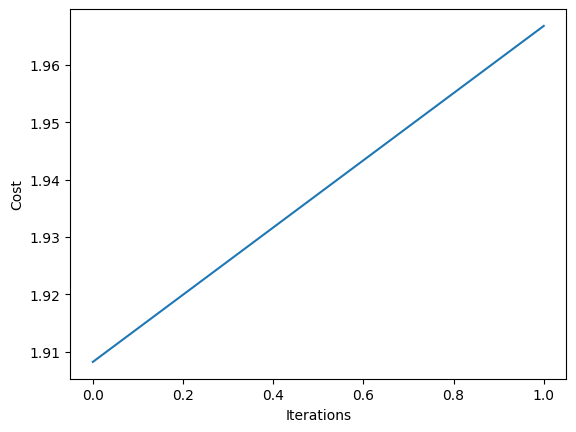

In [165]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [166]:
local_minimum_list = []

for k in range(120):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [167]:
local_minimum_list

array([-4.01757812, -3.5546875 , -3.85351562, -3.70703125, -3.86523438,
       -3.66601562, -3.83203125, -1.24609375, -3.87304688, -3.9375    ,
       -3.828125  , -2.96484375, -1.38867188, -3.69335938, -3.53710938,
       -3.58203125, -3.58984375, -3.61523438, -3.75976562, -3.81445312,
       -3.66601562, -3.8203125 , -3.578125  , -1.6875    , -3.81640625,
       -3.84765625, -3.7890625 , -1.59570312, -1.64648438, -3.82617188,
       -3.67578125, -3.76953125, -0.78320312, -3.78515625, -3.84570312,
       -4.0234375 , -1.62890625, -3.87304688, -3.56835938, -3.85546875,
       -1.40820312, -3.89257812, -3.84375   , -1.484375  , -3.69726562,
       -0.66210938, -1.43945312, -3.64648438, -1.20898438, -0.77734375,
       -3.6875    , -3.84570312, -3.63671875, -3.8515625 , -3.71875   ,
       -1.32226562, -3.67773438, -3.72460938, -3.69726562, -3.73242188,
       -3.87109375, -3.765625  , -3.59375   , -3.50195312, -3.79296875,
       -3.5625    , -1.98828125, -3.83789062, -3.31835938, -0.74

# VQE in Noisy Simulator (Various types of error)

scipy minimize method "cobyla"

## Function Setting

In [3]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [4]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

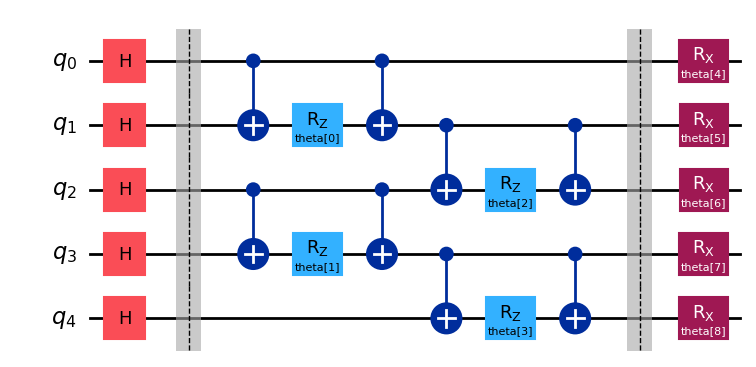

In [5]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [6]:
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

In [7]:
seed_list = [  1,   4,   5,   6,   7,   8,  10,  11,  12,  13,
14,  15,  17,  18,  19,  20,  21,  23,  24,  25,
27,  28,  29,  30,  31,  34,  36,  38,  39,  40,
41,  42,  43,  45,  46,  47,  48,  49,  51,  52,
55,  56,  59,  61,  63,  65,  67,  68,  70,  71,
74,  75,  76,  77,  78,  81,  86,  87,  90,  93,
95,  96,  97,  101, 102, 103, 104, 105, 106, 107,
112, 113, 114, 116, 118, 121, 124, 126, 127, 128,
132, 133, 135, 136, 137, 138, 139, 140, 141, 142,
144, 147, 148, 149, 150, 151, 152, 154, 155, 162,
165, 166, 169, 171, 172, 174, 178]

## Ideal Simulator

In [8]:
noise_model = NoiseModel()

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [9]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [209]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [210]:
mean_ideal = np.mean(local_minimum_list)
var_ideal = np.var(local_minimum_list)
max_ideal = np.max(local_minimum_list)
min_ideal = np.min(local_minimum_list)

print("mean : {0}".format(mean_ideal))
print("variance : {0}".format(var_ideal))
print("maximum : {0}".format(max_ideal))
print("minimum : {0}".format(min_ideal))
print()
print(local_minimum_list)

mean : -5.7891259765625
variance : 0.00837318732738495
maximum : -5.49365234375
minimum : -5.92138671875

[-5.86035156 -5.85449219 -5.69433594 -5.63183594 -5.91845703 -5.87158203
 -5.74755859 -5.72851562 -5.65869141 -5.77441406 -5.78808594 -5.91064453
 -5.8671875  -5.64355469 -5.50585938 -5.8984375  -5.74804688 -5.87939453
 -5.65136719 -5.76464844 -5.90820312 -5.92138672 -5.83984375 -5.69482422
 -5.63085938 -5.76757812 -5.62939453 -5.63671875 -5.85498047 -5.78955078
 -5.85107422 -5.83203125 -5.85351562 -5.49365234 -5.82470703 -5.85498047
 -5.69140625 -5.73339844 -5.82226562 -5.74316406 -5.75390625 -5.72851562
 -5.77929688 -5.71435547 -5.69726562 -5.81494141 -5.828125   -5.859375
 -5.90673828 -5.84277344 -5.75195312 -5.74609375 -5.73828125 -5.79248047
 -5.81054688 -5.90380859 -5.88964844 -5.75585938 -5.86816406 -5.62353516
 -5.88867188 -5.87353516 -5.8671875  -5.81347656 -5.81494141 -5.89941406
 -5.83251953 -5.64550781 -5.88134766 -5.79589844 -5.79052734 -5.85302734
 -5.89013672 -5.7983

In [10]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(seed_list[21])
x0 = 2 * np.pi * np.random.random(9)

callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

options = dict()
options["maxiter"] = 400
options["disp"] = True

res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
)

In [11]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.92138671875
       x: [ 5.777e+00  5.890e+00  5.159e-01  4.998e-01  4.868e+00
            2.854e+00  1.875e+00  6.043e+00  4.940e+00]
    nfev: 145
   maxcv: 0.0

## Reset Error

In [211]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_reset), ('I', 1 - p_reset)]), "reset")


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [212]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [213]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [214]:
mean_rst = np.mean(local_minimum_list)
var_rst = np.var(local_minimum_list)
max_rst = np.max(local_minimum_list)
min_rst = np.min(local_minimum_list)

print("mean : {0}".format(mean_rst))
print("variance : {0}".format(var_rst))
print("maximum : {0}".format(max_rst))
print("minimum : {0}".format(min_rst))
print()
print(local_minimum_list)

mean : -5.7891259765625
variance : 0.00837318732738495
maximum : -5.49365234375
minimum : -5.92138671875

[-5.86035156 -5.85449219 -5.69433594 -5.63183594 -5.91845703 -5.87158203
 -5.74755859 -5.72851562 -5.65869141 -5.77441406 -5.78808594 -5.91064453
 -5.8671875  -5.64355469 -5.50585938 -5.8984375  -5.74804688 -5.87939453
 -5.65136719 -5.76464844 -5.90820312 -5.92138672 -5.83984375 -5.69482422
 -5.63085938 -5.76757812 -5.62939453 -5.63671875 -5.85498047 -5.78955078
 -5.85107422 -5.83203125 -5.85351562 -5.49365234 -5.82470703 -5.85498047
 -5.69140625 -5.73339844 -5.82226562 -5.74316406 -5.75390625 -5.72851562
 -5.77929688 -5.71435547 -5.69726562 -5.81494141 -5.828125   -5.859375
 -5.90673828 -5.84277344 -5.75195312 -5.74609375 -5.73828125 -5.79248047
 -5.81054688 -5.90380859 -5.88964844 -5.75585938 -5.86816406 -5.62353516
 -5.88867188 -5.87353516 -5.8671875  -5.81347656 -5.81494141 -5.89941406
 -5.83251953 -5.64550781 -5.88134766 -5.79589844 -5.79052734 -5.85302734
 -5.89013672 -5.7983

## Measurement Error

In [215]:
noise_model = NoiseModel()

# Example error probabilities
p_measure = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_measure), ('I', 1 - p_measure)]), "measure")


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [216]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [217]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [218]:
mean_measure = np.mean(local_minimum_list)
var_measure = np.var(local_minimum_list)
max_measure = np.max(local_minimum_list)
min_measure = np.min(local_minimum_list)

print("mean : {0}".format(mean_measure))
print("variance : {0}".format(var_measure))
print("maximum : {0}".format(max_measure))
print("minimum : {0}".format(min_measure))
print()
print(local_minimum_list)

mean : -5.62743408203125
variance : 0.008366517370939254
maximum : -5.357177734375
minimum : -5.766357421875

[-5.56274414 -5.61083984 -5.56225586 -5.51538086 -5.72875977 -5.73901367
 -5.56347656 -5.57861328 -5.57006836 -5.54882812 -5.62939453 -5.74267578
 -5.71337891 -5.56518555 -5.59130859 -5.75292969 -5.59399414 -5.66357422
 -5.61083984 -5.45996094 -5.68676758 -5.76635742 -5.62744141 -5.52612305
 -5.46557617 -5.69580078 -5.56298828 -5.52929688 -5.6706543  -5.41113281
 -5.71948242 -5.7097168  -5.75366211 -5.48730469 -5.70849609 -5.57299805
 -5.55078125 -5.6003418  -5.64013672 -5.53466797 -5.56518555 -5.76123047
 -5.59228516 -5.63208008 -5.60766602 -5.43652344 -5.6496582  -5.73901367
 -5.68115234 -5.66308594 -5.63647461 -5.63842773 -5.58325195 -5.49023438
 -5.59692383 -5.75927734 -5.67578125 -5.63427734 -5.72631836 -5.58764648
 -5.54516602 -5.72460938 -5.71655273 -5.64013672 -5.5559082  -5.765625
 -5.58325195 -5.51416016 -5.76318359 -5.52636719 -5.74291992 -5.58007812
 -5.7565918  -5.

## Bit Flip

In [219]:
noise_model = NoiseModel()

# Example error probabilities
p_bit = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [220]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [221]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [222]:
mean_bit = np.mean(local_minimum_list)
var_bit = np.var(local_minimum_list)
max_bit = np.max(local_minimum_list)
min_bit = np.min(local_minimum_list)

print("mean : {0}".format(mean_bit))
print("variance : {0}".format(var_bit))
print("maximum : {0}".format(max_bit))
print("minimum : {0}".format(min_bit))
print()
print(local_minimum_list)

mean : -5.6576416015625
variance : 0.007378599047660828
maximum : -5.3759765625
minimum : -5.79052734375

[-5.5078125  -5.59667969 -5.72119141 -5.74023438 -5.74853516 -5.78417969
 -5.57177734 -5.65527344 -5.52197266 -5.48388672 -5.60351562 -5.74072266
 -5.77587891 -5.56933594 -5.65917969 -5.77001953 -5.49169922 -5.69677734
 -5.63330078 -5.72363281 -5.5859375  -5.74560547 -5.69677734 -5.73925781
 -5.52246094 -5.72460938 -5.64355469 -5.68896484 -5.75390625 -5.68115234
 -5.73339844 -5.71679688 -5.73388672 -5.57861328 -5.70605469 -5.69140625
 -5.62792969 -5.77783203 -5.79052734 -5.62792969 -5.64697266 -5.56835938
 -5.61767578 -5.5703125  -5.58056641 -5.54785156 -5.55859375 -5.74707031
 -5.63183594 -5.75878906 -5.67871094 -5.67333984 -5.60449219 -5.50488281
 -5.69335938 -5.66845703 -5.55957031 -5.64599609 -5.76416016 -5.61572266
 -5.68115234 -5.73339844 -5.75927734 -5.70947266 -5.59277344 -5.63037109
 -5.69482422 -5.52636719 -5.63134766 -5.55322266 -5.65576172 -5.63916016
 -5.66748047 -5.62

## Phase Flip

In [223]:
noise_model = NoiseModel()

# Example error probabilities
p_phase = 0.01

phase1 = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])
phase2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(phase1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(phase2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [224]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [225]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [226]:
mean_phase = np.mean(local_minimum_list)
var_phase = np.var(local_minimum_list)
max_phase = np.max(local_minimum_list)
min_phase = np.min(local_minimum_list)

print("mean : {0}".format(mean_phase))
print("variance : {0}".format(var_phase))
print("maximum : {0}".format(max_phase))
print("minimum : {0}".format(min_phase))
print()
print(local_minimum_list)

mean : -5.6576416015625
variance : 0.007378599047660828
maximum : -5.3759765625
minimum : -5.79052734375

[-5.5078125  -5.59667969 -5.72119141 -5.74023438 -5.74853516 -5.78417969
 -5.57177734 -5.65527344 -5.52197266 -5.48388672 -5.60351562 -5.74072266
 -5.77587891 -5.56933594 -5.65917969 -5.77001953 -5.49169922 -5.69677734
 -5.63330078 -5.72363281 -5.5859375  -5.74560547 -5.69677734 -5.73925781
 -5.52246094 -5.72460938 -5.64355469 -5.68896484 -5.75390625 -5.68115234
 -5.73339844 -5.71679688 -5.73388672 -5.57861328 -5.70605469 -5.69140625
 -5.62792969 -5.77783203 -5.79052734 -5.62792969 -5.64697266 -5.56835938
 -5.61767578 -5.5703125  -5.58056641 -5.54785156 -5.55859375 -5.74707031
 -5.63183594 -5.75878906 -5.67871094 -5.67333984 -5.60449219 -5.50488281
 -5.69335938 -5.66845703 -5.55957031 -5.64599609 -5.76416016 -5.61572266
 -5.68115234 -5.73339844 -5.75927734 -5.70947266 -5.59277344 -5.63037109
 -5.69482422 -5.52636719 -5.63134766 -5.55322266 -5.65576172 -5.63916016
 -5.66748047 -5.62

## Depolarization

In [227]:
noise_model = NoiseModel()

# Example error probabilities
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [228]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [229]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [230]:
mean_depo = np.mean(local_minimum_list)
var_depo = np.var(local_minimum_list)
max_depo = np.max(local_minimum_list)
min_depo = np.min(local_minimum_list)

print("mean : {0}".format(mean_depo))
print("variance : {0}".format(var_depo))
print("maximum : {0}".format(max_depo))
print("minimum : {0}".format(min_depo))
print()
print(local_minimum_list)

mean : -5.57657470703125
variance : 0.009523436278104782
maximum : -5.28662109375
minimum : -5.7333984375

[-5.48999023 -5.56420898 -5.56274414 -5.63525391 -5.73339844 -5.70166016
 -5.48608398 -5.54174805 -5.62280273 -5.53515625 -5.51782227 -5.72387695
 -5.70361328 -5.49145508 -5.52392578 -5.70507812 -5.55224609 -5.67651367
 -5.48510742 -5.50195312 -5.70166016 -5.70141602 -5.5925293  -5.5246582
 -5.43139648 -5.66357422 -5.51416016 -5.51489258 -5.51391602 -5.36743164
 -5.65380859 -5.56616211 -5.69042969 -5.41235352 -5.6875     -5.65087891
 -5.68823242 -5.50683594 -5.67797852 -5.4296875  -5.51171875 -5.60839844
 -5.54101562 -5.52661133 -5.50708008 -5.52441406 -5.59863281 -5.69726562
 -5.44897461 -5.68969727 -5.58154297 -5.57055664 -5.58911133 -5.47460938
 -5.55078125 -5.72729492 -5.65429688 -5.55517578 -5.69091797 -5.42431641
 -5.57836914 -5.69042969 -5.43017578 -5.55712891 -5.61132812 -5.66577148
 -5.41455078 -5.63378906 -5.64672852 -5.35888672 -5.59033203 -5.61547852
 -5.65576172 -5.59

## Summation of all-type Error & Conclusion

In [231]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.01
p_measure = 0.01
p_bit = 0.01
p_phase = 0.01
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

phase1 = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])
phase2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_reset), ('I', 1 - p_reset)]), "reset")

noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_measure), ('I', 1 - p_measure)]), "measure")

noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])

noise_model.add_all_qubit_quantum_error(phase1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(phase2, ["cx"])

noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [232]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [233]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 400
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [234]:
mean_all = np.mean(local_minimum_list)
var_all = np.var(local_minimum_list)
max_all = np.max(local_minimum_list)
min_all = np.min(local_minimum_list)

print("mean : {0}".format(mean_all))
print("variance : {0}".format(var_all))
print("maximum : {0}".format(max_all))
print("minimum : {0}".format(min_all))
print()
print(local_minimum_list)

mean : -5.2622509765625
variance : 0.003942047810554504
maximum : -5.06591796875
minimum : -5.366943359375

[-5.22900391 -5.30175781 -5.31567383 -5.29711914 -5.30957031 -5.35253906
 -5.22875977 -5.29980469 -5.29516602 -5.25537109 -5.21459961 -5.3269043
 -5.2722168  -5.23193359 -5.12109375 -5.33227539 -5.17114258 -5.18237305
 -5.22363281 -5.18920898 -5.36694336 -5.32519531 -5.25610352 -5.30273438
 -5.12841797 -5.32861328 -5.2590332  -5.3581543  -5.33007812 -5.19677734
 -5.25634766 -5.28442383 -5.33520508 -5.26391602 -5.27978516 -5.3112793
 -5.30932617 -5.17626953 -5.13916016 -5.21606445 -5.06591797 -5.25708008
 -5.15039062 -5.33764648 -5.2253418  -5.22851562 -5.23901367 -5.33813477
 -5.29174805 -5.23754883 -5.26806641 -5.2487793  -5.32568359 -5.29174805
 -5.29077148 -5.30151367 -5.17919922 -5.30932617 -5.36352539 -5.31176758
 -5.20874023 -5.34228516 -5.34619141 -5.24926758 -5.2878418  -5.24389648
 -5.23657227 -5.20166016 -5.21801758 -5.28710938 -5.26782227 -5.1706543
 -5.28930664 -5.148

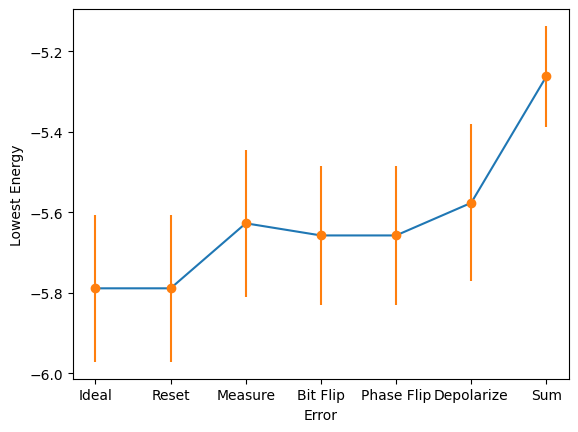

In [235]:
import matplotlib.pyplot as plt

x = ["Ideal", "Reset", "Measure", "Bit Flip", "Phase Flip", "Depolarize", "Sum"]
y = [mean_ideal, mean_rst, mean_measure, mean_bit, mean_phase, mean_depo, mean_all]
yerr = [2*np.sqrt(var_ideal), 2*np.sqrt(var_rst), 2*np.sqrt(var_measure), 2*np.sqrt(var_bit), 2*np.sqrt(var_phase), 2*np.sqrt(var_depo), 2*np.sqrt(var_all)]

plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, fmt ='o')
plt.xlabel('Error')
plt.ylabel('Lowest Energy')
plt.show()

In [236]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.295654296875
       x: [ 2.893e-01  5.937e+00  6.703e+00  6.614e+00  4.794e+00
            5.724e+00  5.494e+00  2.175e+00  2.245e+00]
    nfev: 138
   maxcv: 0.0

# VQE in IBM Hardware (Least Busy)

use parameter optimized in Noiseless Simulator

## optimization_level = 3 resilence_level = 0

In [12]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [13]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

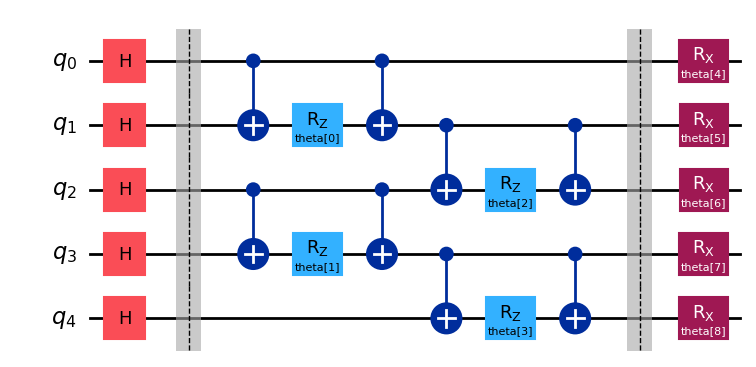

In [14]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [15]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [16]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 0

estimator = Estimator(backend=backend, options=options)

In [17]:
x0 = np.array([5.777e+00, 5.890e+00, 5.159e-01, 4.998e-01, 4.868e+00, 2.854e+00, 1.875e+00, 6.043e+00, 4.940e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.477


## optimization_level = 3 resilence_level = 1

In [18]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [19]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

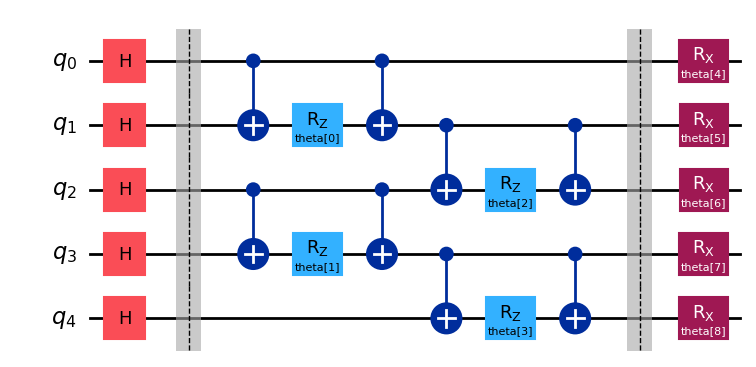

In [20]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [21]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [22]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 1

estimator = Estimator(backend=backend, options=options)

In [23]:
x0 = np.array([5.777e+00, 5.890e+00, 5.159e-01, 4.998e-01, 4.868e+00, 2.854e+00, 1.875e+00, 6.043e+00, 4.940e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

ERROR:websocket:Handshake status 500 Internal Server Error -+-+- {'date': 'Fri, 08 Mar 2024 23:44:30 GMT', 'content-type': 'application/json; charset=utf-8', 'content-length': '188', 'connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'access-control-allow-origin': '*', 'correlation-id': 'cnlq5l8174pv1li9rndg', 'cf-cache-status': 'DYNAMIC', 'server': 'cloudflare', 'cf-ray': '8616b0922cc266bc-AMS'} -+-+- b'{"errors":[{"code":"internal_server_error","message":"error authorizing user","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"cnlq5l8174pv1li9rndg"}' - goodbye
ERROR:websocket:Handshake status 500 Internal Server Error -+-+- {'date': 'Fri, 08 Mar 2024 23:45:10 GMT', 'content-type': 'application/json; charset=utf-8', 'content-length': '188', 'connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'access-control-allow-origin': '*', 'correlation-id': 'cnlq5v8174pv1li9rni0', 'cf-cache-status': 'DYNAMIC', 'server'

-5.6198926955780895


## optimization_level = 3 resilence_level = 2

In [24]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [25]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

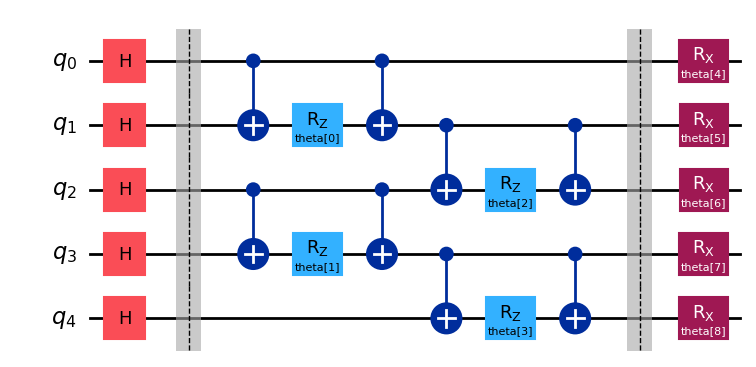

In [26]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [27]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [28]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 2

estimator = Estimator(backend=backend, options=options)

In [29]:
x0 = np.array([5.777e+00, 5.890e+00, 5.159e-01, 4.998e-01, 4.868e+00, 2.854e+00, 1.875e+00, 6.043e+00, 4.940e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.684886920464783


## optimization_level = 3 resilence_level = 3

In [30]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [31]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

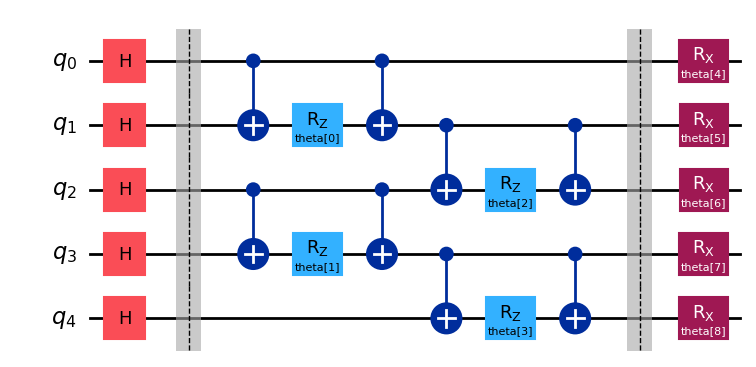

In [32]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [33]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [34]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 3

estimator = Estimator(backend=backend, options=options)

In [35]:
x0 = np.array([5.777e+00, 5.890e+00, 5.159e-01, 4.998e-01, 4.868e+00, 2.854e+00, 1.875e+00, 6.043e+00, 4.940e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.947573843787973


# VQE in IBM Hardware (Least Busy)

use parameter optimized in Noisy Simulator

## optimization_level = 3 resilence_level = 0

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

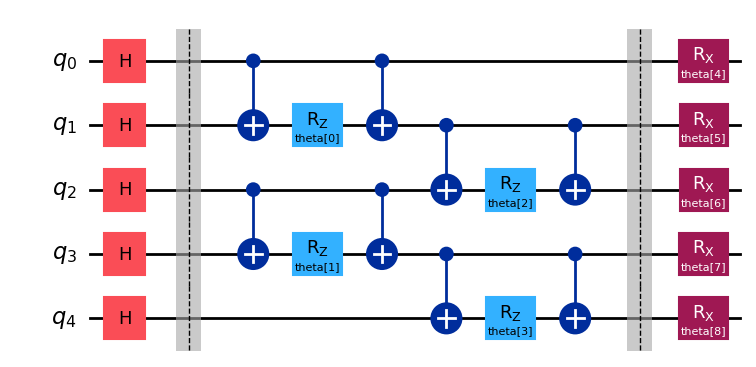

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 0

estimator = Estimator(backend=backend, options=options)

In [ ]:
x0 = np.array([2.893e-01, 5.937e+00, 6.703e+00, 6.614e+00, 4.794e+00, 5.724e+00, 5.494e+00, 2.175e+00, 2.245e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.365499999999999


## optimization_level = 3 resilence_level = 1

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

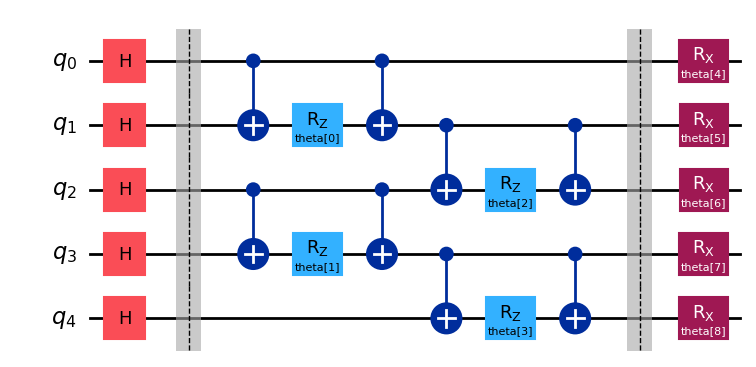

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 1

estimator = Estimator(backend=backend, options=options)

In [ ]:
x0 = np.array([2.893e-01, 5.937e+00, 6.703e+00, 6.614e+00, 4.794e+00, 5.724e+00, 5.494e+00, 2.175e+00, 2.245e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.512612197010883


## optimization_level = 3 resilence_level = 2

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

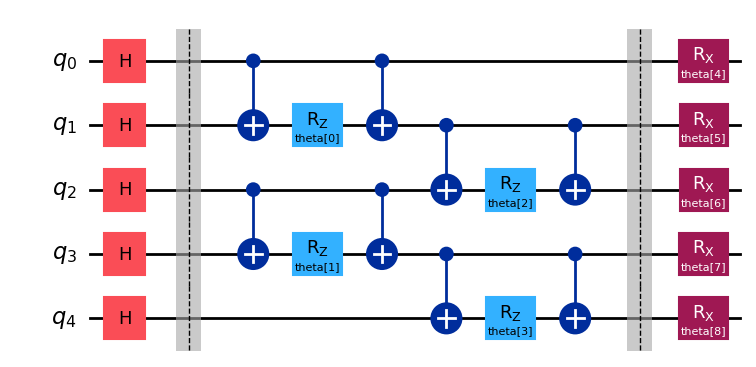

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 2

estimator = Estimator(backend=backend, options=options)

In [ ]:
x0 = np.array([2.893e-01, 5.937e+00, 6.703e+00, 6.614e+00, 4.794e+00, 5.724e+00, 5.494e+00, 2.175e+00, 2.245e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.448659018099893


## optimization_level = 3 resilence_level = 3

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian

interation = 1
bias = -1
coeff_list = [interation for _ in range(5)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "ZIIIZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(10):
    hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

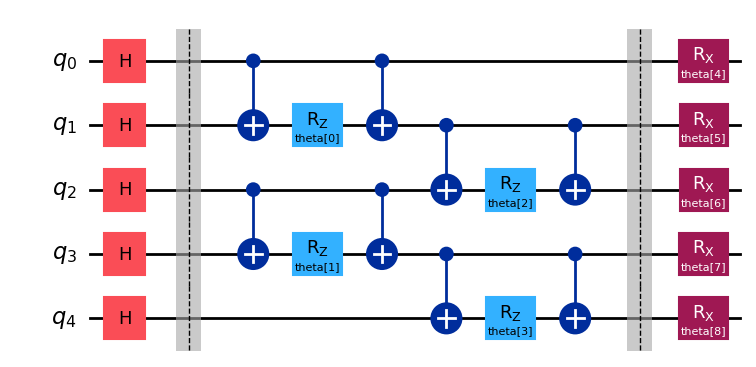

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibmq_mumbai')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 3

estimator = Estimator(backend=backend, options=options)

In [ ]:
x0 = np.array([2.893e-01, 5.937e+00, 6.703e+00, 6.614e+00, 4.794e+00, 5.724e+00, 5.494e+00, 2.175e+00, 2.245e+00])
cost = estimator.run(isa_circuit, isa_observable, parameter_values=x0).result()

print(cost.values[0])

-5.247553725012985
